# Multi-body system of a passenger vehicle

 Importing required libraries

In [2]:
import numpy as np
import scipy.io as sio 
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

%matplotlib widget

Coordinate system object

In [3]:
class Arrow3D(FancyArrowPatch):
    """
    A custom class to create 3D arrows in Matplotlib.
    This class is a modification of the FancyArrowPatch to work in a 3D space.
    """
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        """
        Projects the 3D coordinates to 2D for drawing.
        """
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

def draw_coordinate_system(ax, origin, axis_len, rotation_rad=(0, 0, 0)):
    """
    Draws a 3D coordinate system with colored arrows for the axes.

    Args:
        ax (Axes3D): The 3D axes to draw on.
        origin (tuple): The (x, y, z) coordinates of the origin.
        axis_len (float): The length of the axis arrows.
        rotation_rad (tuple): The Euler angles (roll, pitch, yaw) in radians for rotation.
    """
    roll, pitch, yaw = rotation_rad
    
    # Create rotation matrices
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(roll), -np.sin(roll)],
                    [0, np.sin(roll), np.cos(roll)]])

    R_y = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                    [0, 1, 0],
                    [-np.sin(pitch), 0, np.cos(pitch)]])

    R_z = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                    [np.sin(yaw), np.cos(yaw), 0],
                    [0, 0, 1]])
    
    # Combined rotation matrix (ZYX convention)
    R = R_z @ R_y @ R_x

    # Original axis vectors
    x_axis = np.array([axis_len, 0, 0])
    y_axis = np.array([0, axis_len, 0])
    z_axis = np.array([0, 0, axis_len])

    # Rotated axis vectors
    x_rotated = R @ x_axis
    y_rotated = R @ y_axis
    z_rotated = R @ z_axis

    # X-axis arrow (red)
    arrow_x = Arrow3D(
        [origin[0], origin[0] + x_rotated[0]],
        [origin[1], origin[1] + x_rotated[1]],
        [origin[2], origin[2] + x_rotated[2]],
        mutation_scale=20, lw=1.5, arrowstyle="-|>", color="r"
    )
    ax.add_artist(arrow_x)

    # Y-axis arrow (green)
    arrow_y = Arrow3D(
        [origin[0], origin[0] + y_rotated[0]],
        [origin[1], origin[1] + y_rotated[1]],
        [origin[2], origin[2] + y_rotated[2]],
        mutation_scale=20, lw=1.5, arrowstyle="-|>", color="g"
    )
    ax.add_artist(arrow_y)

    # Z-axis arrow (blue)
    arrow_z = Arrow3D(
        [origin[0], origin[0] + z_rotated[0]],
        [origin[1], origin[1] + z_rotated[1]],
        [origin[2], origin[2] + z_rotated[2]],
        mutation_scale=20, lw=1.5, arrowstyle="-|>", color="b"
    )
    ax.add_artist(arrow_z)

### Test coordinate system axis

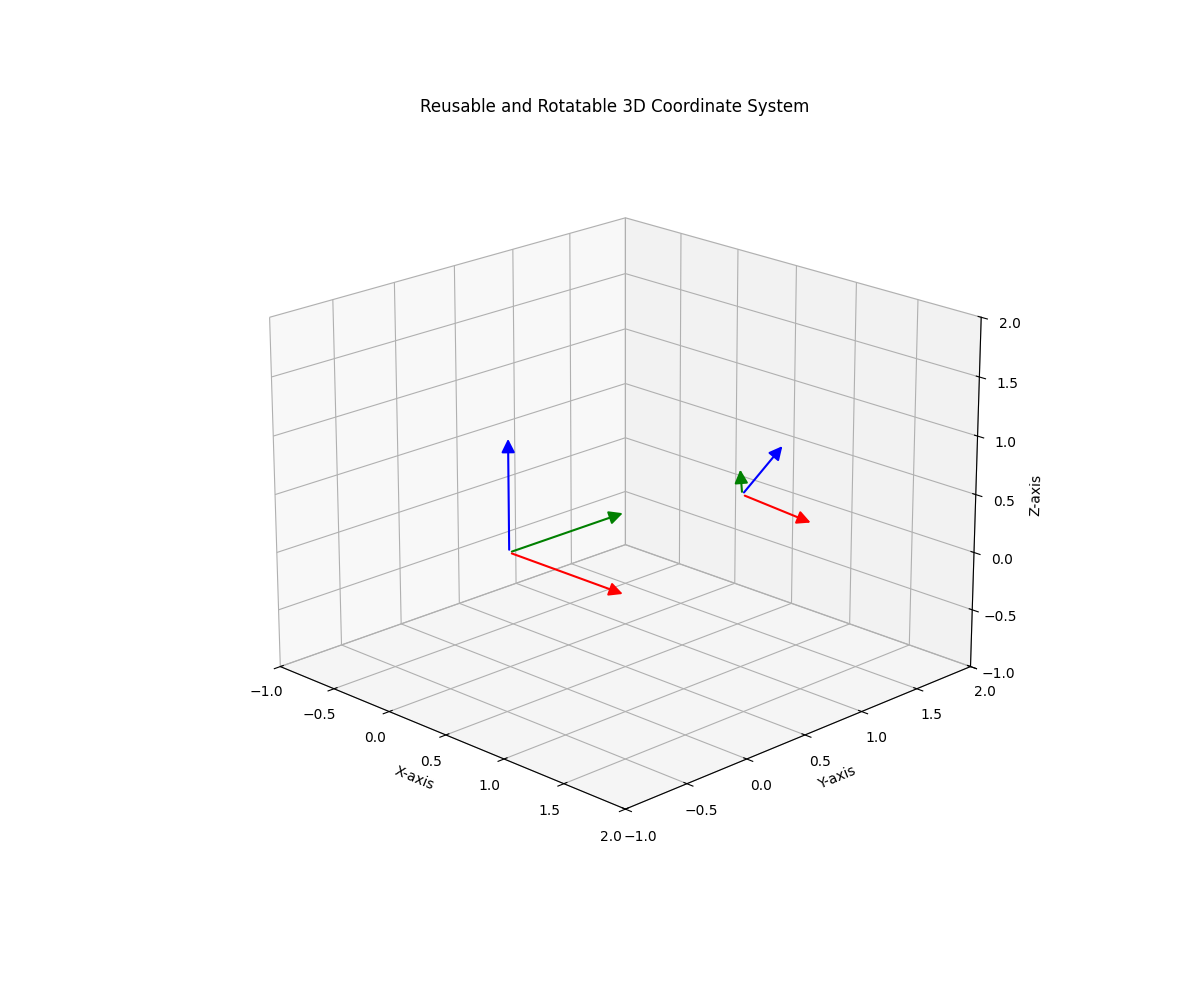

In [4]:
# --- Example Usage ---

# 1. Create a figure and a 3D axes
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 2. Draw the main coordinate system at the origin with no rotation
draw_coordinate_system(ax, (0, 0, 0), 1.0)

# 3. Draw a second coordinate system, translated and rotated
#    Rotation: 45 degrees yaw (around Z), 30 degrees pitch (around Y)
rotation_angles_deg = (0, 30, 45)
rotation_angles_rad = np.deg2rad(rotation_angles_deg)
draw_coordinate_system(ax, (1, 1, 0.5), 0.5, rotation_angles_rad)

# 4. Set plot limits and labels
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
ax.set_zlim([-1, 2])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Reusable and Rotatable 3D Coordinate System')
ax.view_init(elev=20., azim=-45) # Set a nice viewing angle

# 5. Show the plot
plt.show()